시험 - 샘플링 개수 파악하기(그래프 내에서 점의 개수) / 샘플의 개수와 시간의 관계 잘 이해하기

# Singal Processing 신호(=소리) 처리

기본적으로 미리 불러와야할 것들

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

## Phasor
- 시간영역에서 주파수 영역으로 계산하기 위한 툴
- sound wave 로 만들어지는 것
- 하나의 벡터임!


- sine함수가 phasor만드는 과정
- sine 대신 exponential함수 써도 phasor 만들 수 있

#### Parameter 매개변수
- 하나의 sine wave를 정의할 수 있는 것들 

In [2]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz

- amp = amplitude. 진폭 ex) amp=1 이면 -1~1 범위라는 것
- sr= sampling rate. sound의 해상도 느낌 →  1초에 몇개의 숫자를 담을까 (개별 숫자가 몇개 들어있는지) 
- →ex) sr=10000 의미 = 0~1초에 만개의 정보가 들어가 있는 것. 즉, 1초를 10000개로 쪼갠것
- dur = duration
- freq = frequency. 주파수. 음의 높낮이 관련 → 1초 안에 정확히 몇번 반복해야 한다 (태극문양이 1초에 반복되는 횟수)
- →ex) freq=1 의미 = 태극문양이 한번 있는 것. 즉 사이클이 한번만 있는 것(1초내에)


- sine wave = 음의 높낮이(freq. 얼마나 빈번한지 따라 결정) + 음의 강도(amp. 진폭) 으로 이루어짐

→ sine 함수 이루는 결정적인 요소 두가지 = freq 와 amp

cf)
- 아날로그 : continuous하게 모든 정보 다 기록. sr과 dur 필요 없
- 디지털전자정보 : descriptive 하게 숫자 정보로 전환되서 들어가야. sr과 dur 꼭 필요


- Hz (헤르츠)는 어떤 특정위한 단위가 아니고 → 1초에 몇개 나오는거에 대해 얘기할 수있으면 헤르츠 단위 쓸 수 있
- sr, freq 단위는 같지만 완전 다른 개념
- sr=숫자가 몇개이냐고 / freq = 태극무니가 몇개 나오냐(즉, sine wave의 한바퀴가 몇개)

### 1. Sine함수로 Phasor 만드는 과정 
Sine 함수가 Phasor 역할
#### 1. 첫번째 단계 : 시간 만들기 generate time

In [3]:
# generate time
t = np.arange(1, sr)

→ 1부터 sr(sampling rate) 까지 숫자 만들어내는 것 = 1부터 9999까지 (위에서 지정한 sr 값이 10000이니까)

In [4]:
# generate time
t = np.arange(1, sr+1)/sr

→ 만분의1부터 만분의만 초(=1초)까지 = 1초 안에 있는 time sample을 만든 것. 1초에 만개의 샘플을 만든다. 0~1초 사이에 (즉 1초 안에)

In [5]:
# generate time
t = np.arange(1, sr *0.5)/sr

→ 0.5 초까지만 time sample 만든 것 = 만분의1초 부터 만분의 5000초 까지

In [5]:
# generate time
t = np.arange(1, sr *0.5)/sr
len(t)

4999

In [6]:
# generate time
t = np.arange(1, sr *0.5+1)/sr
len(t)

5000

→ sr * 0.5(=dur) 뒤에 +1을 해줘야만 진정한 5000개. ∵(1, sr* 0.5) = 1~4999 이기에

#####  진짜 time만드는 핵심코딩 한줄

In [8]:
# generate time
t = np.arange(1, sr * dur+1)/sr

- 시간을 만분의1 초부터 만분의 5000까지 = 1초를 그만틈 잘게 쪼갠것

#### 2. 두번째 단계 : theta 만들기 (시간을 각도 값으로 변환)

In [9]:
# generate phase
theta = t * 2*np.pi * freq

#generate phase : time값 과 각도값 교묘히 합치는 과정
- time을 theta로 convert 해주는 과정 → freq 들어가는 순간 각도가 의미있는 값이 됨(freq 정해지면 time을 radian으로 바꿔줄 수 있)


- sine함수는 time값을 직접 받을 수 없고 각도값으로 받아들이므로 radian으로 변환시키는 과정이 필요한 것


- cf) 한freq = 2파이 (1초 안에 2파이 한번 들어감. 1파이=180도. 파이/4 = 45도)
- cf) freq=2로 정하면 -> 4파이가 됌 (0부터 4파이까지) 즉 두바퀴 도는 것
- 각도 : degree/radian (radian = 180도/파이, 2pi* radian = 360도) 

#### 코딩 의미

→ 위에서 t=(0~1초)로 만들어놓고 거기에 × 2파이 = 0~2파이 까지 가는데 그게 만개로 쪼개졌다 (1초안에 2파이가 한번 들어감)

→ 그리고 파이썬이 알아들을 수 있게 numpy차용해서 파이써야함 ∴ 그냥 pi 쓰는게 아니라 np.pi써야함

→ time의 t와 벡터theta의 t의 값은 같은것 (= 둘의 길이 같다 ∵ theta는 time이 라디안radian 으로 convert된 것) 

#### 3. 마지막 단계 : sine 함수 만들기

In [10]:
# generate signal by cosine-phasor
s = np.sin(theta)

- 여기 s 에 sin에 해당하는 값이 들어가 있게 되는 것

cf) len(s) 역시 5000

#### 코딩 의미
→ np 안에 있는 sin사인 함수를 쓰겠다

→ sine 함수가 받아들이는 변수값은 각도 값 즉,radian (의미있는 결과 출력하기 위해서)

- cf) 실체 있는 시간을 만들기 위해서는 (사인 함수로)
1. 시간을 제일 먼저 설정해줘야 하고(=x축)
2. 시간 값을 각도 값으로 변환해주고
3. 사인함수에 집어넣기

→ 그래야 실제 소리로 play 될 수 있음

<정리>
1. 시간부터 먼저 만들기 (시간 없이 사인wave만들 수 있긴 한데 실체가 없는 것!!!) → 물리적 세계에서 듣는 소리는 시간이 foundation로 있어야

(따라서 radian부터 만든게 아니라 시간부터 만들어주고)

2. 시간 값을 radina라디안으로 변환

3. 사인함수 적용

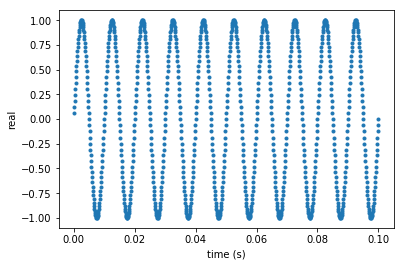

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ipd.Audio(s, rate=sr)

위에서 이미 ploting 관련 정의 해놨음 → ploting관련 라이브러리가 matplotlib 

- fig = 큰 틀

- ploting할때는 theta가 쓰이지 않고 t (x축=시간의 값) 와 s (y축=sine함수 값)만 쓰이는 것 → 2차원

ax.plot(t[0:1000], s[0:1000], '.') 
- 1부터 1000까지 (총 1000개의 값 생성 → 그림에서 점의 개수. t=0부터 999까지)
- 총 3개의 argument들 들어가는데 맨 뒤 점은 decrate하는 역할로 그림이 점으로 찍혀서 표현되게 하는 것

ipd.Audio(s, rate=sr) → 소리 실행시키는 명령 line (Audio는 라이브러리, s= sinewave 로 만든 signal)

<특징>
- plot의 첫번째 입력과 두번째 입력의 벡터는 길이가 같아야 한다. 꼭. (각각의 벡터의 길이가 같)
- 그래프의 점은 ex) 다섯번째 점= t값 4, s값 4 (x,y)포인트에 의해 나타나지는 것 ∵ indexing은 무조건 0이 첫번째의미


- 만개의 벡터를 만들었는데 그 중 100번째 해당하는 점의 시간과 theta값을 알 수 있


- 점 하나 빼고 표현하기 (그 부분에 해당하는 indexing 빼고 표현하기)
- ex) 4번째 점을 빼고자 하면 t[0:3]+t[4:200], s[0:3]+s[4:200] 를 넣어주면 4번째 점만 빼고 플랏팅을 할 수 있을 거라 기대

하지만 저희가 만들어 놓은 t와 s는 python list가 아니라 numpy array여서 해당 문법(+)은 이어붙이는 것이 아니라 앞서서 numpy chapter에서 배운 broadcasting으로 적용돼서 에러가 나오는데, 이를 해결하기 위해서는

1. t와 s를 python list로 변환(np에서 제공하는 tolist 활용)
2. np에서 제공하는 nd array 이어붙이는 method 활용(np.concatenate)
3. enumerate와 list comprehension을 활용
등의 방법이 있습니다.

3번 방법의 예를 들면
→ ax.plot([t_ for i, t_ in enumerate(t[:200]) if i != 3], [s_ for i, s_ in enumerate(s[:200]) if i != 3], '.')

cf) s[0:1000] 여기 1000의 숫자를 100이던 5000(0~0.5초)이던 바꿀 수 있
- 맨위에 amp값 0.5로 바꿔주고
- s = np.sin(theta) 이 함수에 amp 곱해주기 → s = np.amp.sin(theta)  (전에는 amp값이 1이어서 표시 안해도 됐던거)

### 2. Exponential 함수(e)로 Phasor 만들기
sine 함수로 만드는 과정과 차이점 유의하면서 보기
#### 1.첫번째 단계 : generate signal by complex-phasor

In [13]:
# generate signal by complex-phasor
c = np.exp(theta*1j)

- c = complex number. x축=time / y축에는 complex number의 실수(a부분)/ z축에는 허수부분(b부분) → 3차원

- c = np.sin(theta)를 변형한 것 / np.exp=수학 숫자 e / 안에 theta i(=1j)는 지수

- 익스포넨셜 e에 theta i가 지수로 들어가있는 것

- 변하는 건 theta 뿐이고 나머지는 상수

- c벡터의 개수는 theta의 개수와 같

- c벡터는 복소(complex number)일텐데 복소수는 다 a+bi로 표현되기에 (a,b) 따와서 이차원에서 표현할 수 있는 것

Text(0.5, 0, 'imag')

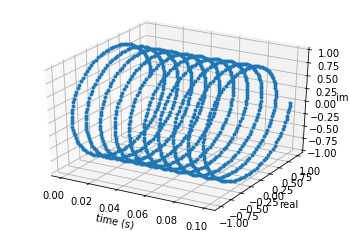

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

- fig = plt.figure()
- ax = fig.add_subplot(111, projection='3d')

→ 여기까진 그냥 plotting하는 과정

- sine과 형식 비교해보기 →x축에 t와 y축에 s만 넣어줬던 형식 = 2차원
- exp 에선 → x축에 t, y축에 c.real(복소수 중 a에 해당하는 실수부), z축에 c.imag(복소수 중 b에 해당하는 허수부) = 3차원

여기서도 개수는 1000개

cf) t[0 : 2 : 200] = 0에서 200까지 가는데 2씩 뛰면서 표현해주는 것

< production >

sine 함수 대신에 exp사용해서 complex num만들었을 때
- 허수축 (허수부) 정면으로 보는 것 → 커브가 sine함수랑 같다
- 실수축 (실수부) 정면으로 볼 때 → 커브 모양이 cosine함수랑 같다
    
따라서 exp쓰면 사인, 코사인 함수 다 들어있는 것 = 더 제너럴 한 정보들 갖고 있

## Generate pulse train

<기본 내용>
- 모든 소리는(=signal) 어떤 복잡한 소리라도 다양한 sine 곡선(wave)의 합으로 나타낼 수 있음
→ 대표적인게 우리 목소리
- sound는 벡터이자 signal (signal이라 한 순간 time값이 들어간것)
- 모든 signal은 일단 소리로 play가 됨 (진짜 소리가 아니어도. 심지어 전파나 주식차트 같은 것도)


- times series/ temporal projectory(?) / time signal = 다 같은 말
- 대표 예) 기상변화/ 온도변화 (긴 시간 속에서) / 주식시장

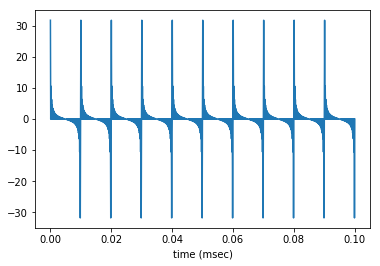

In [15]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

= 인공성대가 내는 것과 같은 소리 

→ 이 명령으로 하고자 하는 것 : sine wave들의 합으로 소리 만들기
- 100짜리 200(컬트?) 300짜리 다 합쳐서 만드는 소리가 지금 이 sine wave / 여기서 F = 주파수

#### 코딩 의미
→ F zero 부터 end(=int(sr/2))까지 (=0부터 5000까지 ∵sr=10000)를 다 합해주는것 by for루프

→ s = np.zeros(len(t)) (→0으로 만들어줘야함) 이부분 필수 왜냐면 tmp 만들 때 s 들어가기에

→ for freq in range(F0, Fend+1, F0) = 100(F0=100)부터 5000까지(5000까지 되려면 뒤에 +1해줘야) 100씩 증가해서

→ 총 50번 도는 것. +1없으면 49번 도는 것

- theta = t * 2*np.pi * freq → time은 위에서 만들어논 값
- tmp(템프) 한번 폴루프 돌 때 들어가는 signal 값

마지막 결과!! 50번 돌고나면 맨 마지막 결과값 나타나는 것